# Projet statistique 

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Statistique descriptive pour comparaison de deux populations

Ici, nous considererons deux jeux de donnees de meme nature. L'objectif etant de comparer la moyenne des varaiables considerer.
Nous travaillons d'abord sur le premier jeu de donnée. Il contient  des variables telle que l'age, le genre, le niveau d'education, le travail, le nombre d'annees d'experience et le salaire. 
Nous nous concentrerons ici sur le salaire.

In [29]:
df1 = pd.read_csv("Salary Data.csv", header = 0)

In [30]:
df1.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


Avec cette methode, nous obtenons un resumé statistique des données de ce jeu de données.

Nous traçons un nuage de point du nombre d'années d'experience en fonction du salaire perçu.

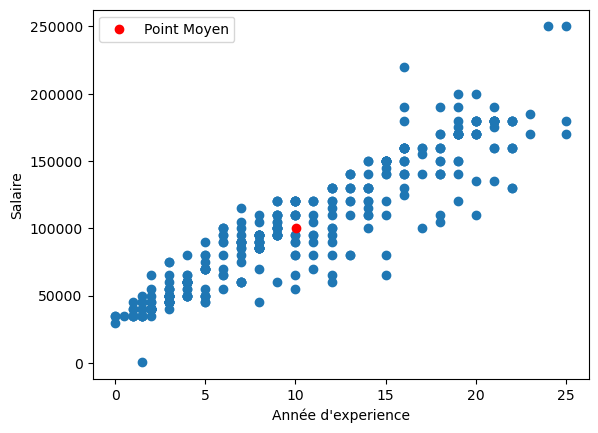

In [31]:
#les moyennes des salaires et des nombres d'années d'experience
from math import sqrt

Moy_Salary_1 = df1["Salary"].mean()
Ecart_type_Salary_1 = df1["Salary"].std()
n_Salary_1 = df1["Salary"].count()

Moy_Years_1 = round(df1["Years of Experience"].mean(),2)
Ecart_type_Years_1 = df1["Years of Experience"].std()
n_Years_1 = df1["Years of Experience"].count()

plt.scatter(df1["Years of Experience"], df1["Salary"])
plt.scatter(Moy_Years_1, Moy_Salary_1, color='red', marker='o', label='Point Moyen')

plt.xlabel("Année d'experience")
plt.ylabel("Salaire")
plt.legend()

plt.show()

Nous determinons maintenant les intervalles de confiance avec : 
$$\bar{x} \pm Z \times \frac{s}{\sqrt{n}}$$
avec $$s: Ecart-type$$
$$Z : \text{valeur critique de la distribution normale associée au niveau de confiance de 95\%} $$


In [32]:
#determination de l'intervalle de confiance !
Z = 1.96
low_lmt_Salary_1 = round(Moy_Salary_1 - Z*Ecart_type_Salary_1/sqrt(n_Salary_1),2)
high_lmt_Salary_1 = round(Moy_Salary_1 + Z*Ecart_type_Salary_1/sqrt(n_Salary_1),2)
print("Intervalle de confiance: ["+str(low_lmt_Salary_1)+" , "+ str(high_lmt_Salary_1)+"]")


Intervalle de confiance: [95681.71 , 105472.98]


L'intervalle de confiance à 95% de la moyenne salariale est [ 94524.38 ; 106630.32 ]

Nous poursuivons notre analyse sur notre second jeu de données de même nature que le premier.

In [33]:
df2 = pd.read_csv("Salary_dataset.csv", header = 0)

In [34]:
#les moyennes des salaires et des nombres d'années d'experience

from math import sqrt

Moy_Salary_2 = df2["Salary"].mean()
Ecart_type_Salary_2 = df2["Salary"].std()
n_Salary_2 = df2["Salary"].count()

Moy_Years_2 = df2["YearsExperience"].mean()
Ecart_type_Years_2 = df2["YearsExperience"].std()
n_Years_2 = df2["YearsExperience"].count()


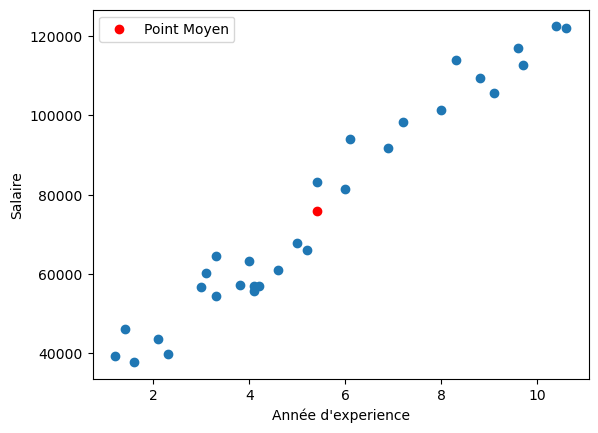

In [35]:
# df2.plot.scatter("YearsExperience", "Salary")

plt.scatter(df2["YearsExperience"], df2["Salary"])
plt.scatter(Moy_Years_2, Moy_Salary_2, color='red', marker='o', label='Point Moyen')

plt.xlabel("Année d'experience")
plt.ylabel("Salaire")
plt.legend()

plt.show()

In [36]:
# determination de l'intervalle de confiance !

low_lmt_Salary_2 = round(Moy_Salary_2 - Z*Ecart_type_Salary_2/sqrt(n_Salary_2),2)
high_lmt_Salary_2 = round(Moy_Salary_2 + Z*Ecart_type_Salary_2/sqrt(n_Salary_2),2)
print("Intervalle de confiance: ["+str(low_lmt_Salary_2)+","+ str(high_lmt_Salary_2)+"]")

Intervalle de confiance: [66193.87,85814.13]


L'intervalle de confiance à 95% de la moyenne salariale est [ 72564.14 ; 79443.86 ]

# Statistique Inferencielle 

Les hypotheses que nous allons considerer sont:
$$H_0 : \text{Il n'y a pas de difference significative entre les moyennes des deux groupes de données}$$
$$H_1 : \text{Il y a une difference significative entre les moyennes des deux groupes de données}$$


Nous allons employer le test statistique de student sur les groupes.

In [37]:
from scipy.stats import ttest_ind

# Test t de Student
statistique_t, p_value = ttest_ind(df1["Salary"].dropna(), df2["Salary"].dropna(), equal_var=False)

alpha = 0.05  
print("Statistique t :", statistique_t)
print("P-value :", p_value)

if p_value < alpha:
    print("La différence entre les moyennes est statistiquement significative.")
else:
    print("Il n'y a pas de différence statistiquement significative entre les moyennes.")


Statistique t : 4.392963123219234
P-value : 6.718810739703156e-05
La différence entre les moyennes est statistiquement significative.


La p-value étant inferieure au seuil choisi (0.05), nous rejetons alors l'hypothése nulle.

Les outils d'analyse statistique descriptive et inferentielle nous ont permis de faire une certaine étude des jeux de données à notre disposition; de les comprendre et même d'effectuer des test. La plupart des outils étant integrés dans les modules, la tâche s'en voit s'implifier.